<a href="https://colab.research.google.com/github/Anjana2002/tensorflow-ai-journey/blob/main/Intro%20to%20tensorflow/exploring_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Convolution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.datasets import ascent

In [ ]:
ascent_img = ascent()

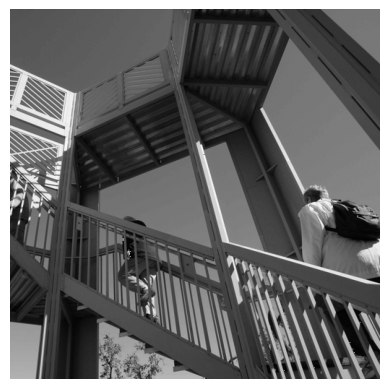

In [ ]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_img)
plt.show()

In [ ]:
# Copy image to a numpy array
image_transformed = np.copy(ascent_img)

size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]
print(f"image_transformed has shape: {size_x, size_y}")

image_transformed has shape: (512, 512)


In [ ]:
filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
weight = 1

In [ ]:
ascent_img = ascent_img.astype(float)


for x in range(1, size_x-1):
  for y in range(1, size_y-1):
    convolution = 0.0
    convolution = convolution + (ascent_img[x-1, y-1] * filter[0][0])
    convolution = convolution + (ascent_img[x-1, y] * filter[0][1])
    convolution = convolution + (ascent_img[x-1, y+1] * filter[0][2])
    convolution = convolution + (ascent_img[x, y-1] * filter[1][0])
    convolution = convolution + (ascent_img[x, y] * filter[1][1])
    convolution = convolution + (ascent_img[x, y+1] * filter[1][2])
    convolution = convolution + (ascent_img[x+1, y-1] * filter[2][0])
    convolution = convolution + (ascent_img[x+1, y] * filter[2][1])
    convolution = convolution + (ascent_img[x+1, y+1] * filter[2][2])

    # Multiply by weight
    convolution = convolution * weight

    # Check the boundaries of the pixel values
    if(convolution < 0):
        convolution = 0
    if(convolution > 255):
        convolution = 255

    image_transformed[x, y] = convolution

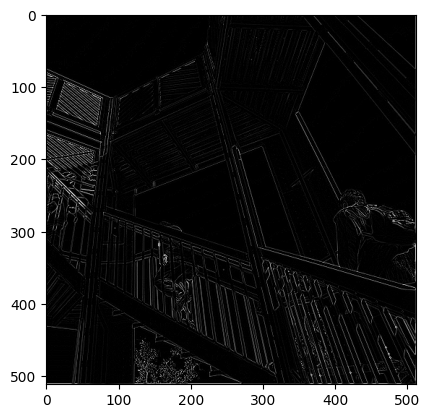

In [ ]:
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()

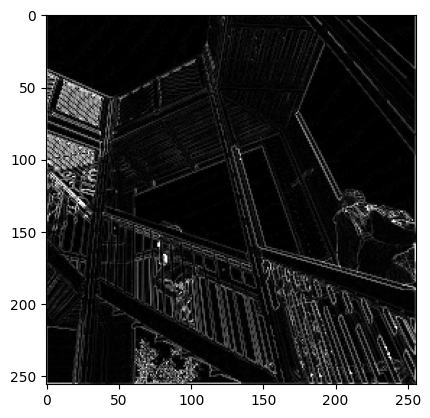

In [ ]:
# Assign dimensions half the size of the original image
new_x = int(size_x / 2)
new_y = int(size_y / 2)

newImage = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):

        pixels = []
        pixels.append(image_transformed[x, y])
        pixels.append(image_transformed[x+1, y])
        pixels.append(image_transformed[x, y+1])
        pixels.append(image_transformed[x+1, y+1])
        newImage[int(x / 2), int(y / 2)] = max(pixels)

plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()